In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
import pandas as pd
import os


from IPython.display import HTML, display, clear_output

try:
    plt.rcParams["animation.html"] = "jshtml"
except ValueError:
    plt.rcParams["animation.html"] = "html5"

%matplotlib inline

# 1) Intro

In [2]:
def initialize_centers(X, K):

    """
    This function randomly initializes K centroids by choosing
    from input data.
    :param X: input data as numpy 2d array
    :param K: number of centroids
    :return: centroids
    """

    m, n = X.shape
    # choosing K out of m data points and each points can
    rand_i = np.random.choice(m, K, replace=False)
    centroids = X[rand_i, :]
    return centroids

In [3]:
def find_closest_centers(X, centroids):

    """
    This function assigns closest centroid to each data point
    :param X: input data as numpy 2d array
    :param centroids: current guess of centroids
    :return: indices that show assigned cluster to each data point
    """

    m = X.shape[0]
    idx = np.zeros(m, dtype=int)

    for i in range(m):
        # Euclidean distances
        errs = np.sum(np.square(centroids - X[i, :]), axis=1)
        idx[i] = np.argmin(errs)

    return idx

In [4]:
def compute_means(X, idx, K):

    """
    This function updates centroids to the mean of points in each cluster
    :param X: input data as numpy 2d array
    :param idx:
    :param K:
    :return:
    """

    n = X.shape[1]
    centroids = np.zeros((K, n))
    for k in range(K):
        # data points in each cluster
        x = X[idx == k]
        centroids[k, :] = np.mean(x, axis=0)

    return centroids

# 2) Implementation of K-means

In [5]:
def plt_kmeans(i, X, centroid_history, idx_history):
    
    """
    this function will be passed to matplotlib animation to show
    progress of kmeans on input data
    :param i: current iteration
    :param X: input 2d data
    :param centers_history: list of centroids in all iterations
    :param idx_history: list of assigned cluster in all iterations
    :return: None
    """
    
    K = centroid_history[0].shape[0]
    plt.gcf().clf()
    cmap = plt.cm.rainbow
    norm = mpl.colors.Normalize(vmin=0, vmax=5)

    for k in range(K):
        # current centroids
        current = np.stack([c[k, :] for c in centroid_history[:i+1]],
                           axis=0)
        plt.plot(current[:, 0], current[:, 1],
                    '-Xk',
                    mec='k',
                    lw=2,
                    ms=10,
                    mfc=cmap(norm(k)),
                    mew=2)

        plt.scatter(X[:, 0], X[:, 1],
                       c=idx_history[i],
                       cmap=cmap,
                       marker='o',
                       s=8**2,
                       linewidths=1,)
    plt.grid(False)
    plt.title('Iteration number %d' % (i+1))

In [6]:
def run_kmeans(X, K, epoch=15, verbose=True):
    """
    This function runs k-means on X to find K clusters, updating centroids
    in each epoch
    :param X: input data
    :param K: number of clusters to find
    :param epoch: maximum iterations
    :param epoch: Whether to plot progress
    :return: final centroids and cluster assignments with plot object
    """
    centers = initialize_centers(X, K)
    
    idx = None
    idx_history = []
    centers_history = []
    visual = None
    for j in range(epoch):
        idx = find_closest_centers(X, centers)
        
        if verbose:
            idx_history.append(idx)
            centers_history.append(centers)
        
        centers = compute_means(X, idx, K)
        
    if verbose:
        fig = plt.figure()
        visual = FuncAnimation(fig, plt_kmeans,
                               frames=epoch,
                               interval=500,
                               repeat_delay=1000,
                               fargs=(X, centers_history, idx_history))
    return centers, idx, visual

# 3) Running K-means

In [7]:
path = os.path.join(os.path.curdir,"../Dataset/Dataset1.csv")
data = pd.read_csv(path)
X = np.array(data)
print("input shape: ", X.shape)

input shape:  (500, 2)


## k = 2

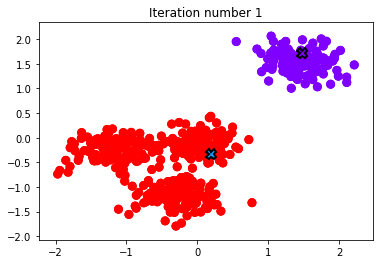

In [8]:
centroids, idx, visual = run_kmeans(X, 2)
visual

## k = 3

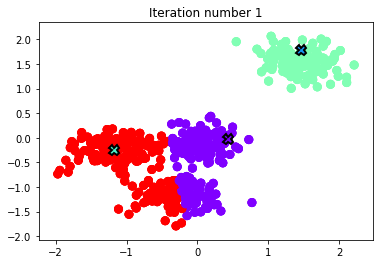

In [9]:
centroids, idx, visual = run_kmeans(X, 3)
visual

## k = 4

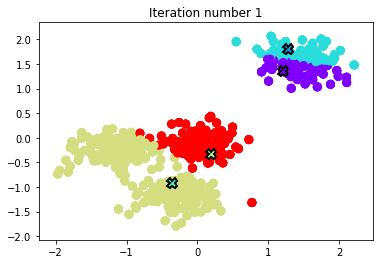

In [10]:
centroids, idx, visual = run_kmeans(X, 4)
visual

# 4) Evaluation

In [11]:
def compute_error(X, idx, centers):
    K = centers.shape[0]
    errors = np.zeros(K)
    for k in range(K):
        x = X [idx == k]
        errors[k] = np.mean(np.sqrt(np.sum(np.square(centroids[k] - x),
                                           axis=1)))
    return np.mean(errors)

In [12]:
errs = []
for k in range(1,15):
    centroids, idx, _ = run_kmeans(X, k, 15, False)
    errs.append(compute_error(X, idx, centroids))

Text(0, 0.5, 'cluster error')

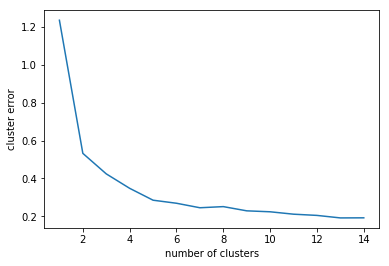

In [13]:
plt.plot(np.arange(1, 15), errs)
plt.xlabel("number of clusters")
plt.ylabel("cluster error")

# 5) Weaknesses and Restrictions of K-means

In [14]:
path2 = os.path.join(os.path.curdir,"../Dataset/Dataset2.csv")
data2 = pd.read_csv(path2)
X = np.array(data2)

## k = 2

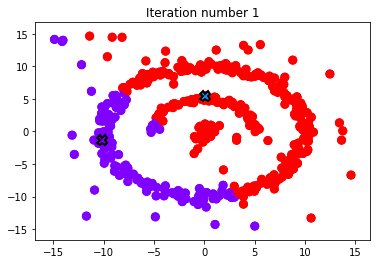

In [15]:
errs = np.zeros((4,1))
centroids, idx, visual = run_kmeans(X, 2, 15, True)
errs[0] = compute_error(X, idx, centroids)
visual

## k = 3

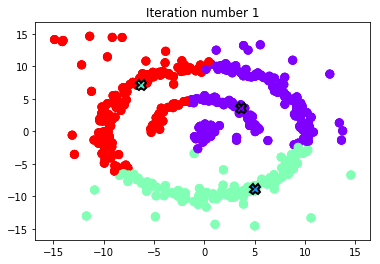

In [16]:
centroids, idx, visual = run_kmeans(X, 3, 15, True)
errs[1] = compute_error(X, idx, centroids)
visual

## k = 4

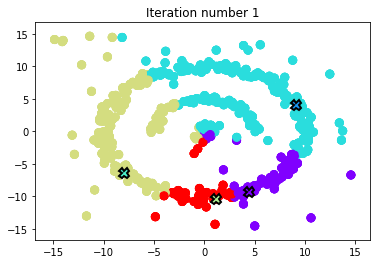

In [17]:
centroids, idx, visual = run_kmeans(X, 4, 15, True)
errs[2] = compute_error(X, idx, centroids)
visual

## k = 5

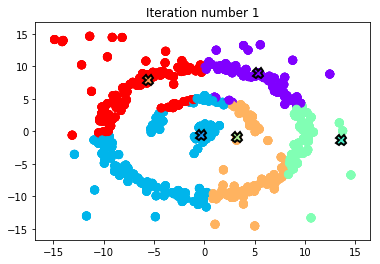

In [18]:
centroids, idx, visual = run_kmeans(X, 5, 15, True)
errs[3] = compute_error(X, idx, centroids)
visual

Text(0, 0.5, 'cluster error')

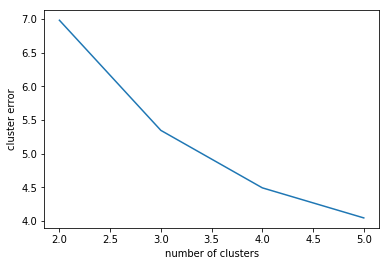

In [19]:
plt.plot([2, 3, 4, 5], errs)
plt.xlabel("number of clusters")
plt.ylabel("cluster error")